<a href="https://colab.research.google.com/github/Rishi0115/PythonCode/blob/main/building_linear_regression_from_scratch_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np

class Linear_Regression:
  def __init__(self, learning_rate, n_iters):
    self.learning_rate = learning_rate
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, x, y):
    self.m, self.n = x.shape
    self.weights = np.zeros(self.n)
    self.bias = 0
    self.x = x
    self.y = y

    for _ in range(self.n_iters):
      self.update_weight()

  def predict(self, x):
    return x.dot(self.weights) + self.bias

  def mse(self, y_pred, y_true):
    return np.mean((y_pred - y_true)**2)  # Corrected MSE calculation

  def update_weight(self):
    y_pred = self.predict(self.x)
    dw = -(2 * (self.x.T).dot(self.y - y_pred)) / self.m
    db = -(2 * np.sum(self.y - y_pred)) / self.m
    self.weights = self.weights - self.learning_rate * dw  # Update self.weights
    self.bias = self.bias - self.learning_rate * db  # Update self.bias

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [5]:
df=pd.read_csv('/content/salary_data.csv')

In [6]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
 df.shape

(30, 2)

In [8]:
 df.isna().sum()

,0
YearsExperience,0
Salary,0


In [9]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [10]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [11]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=2)

In [34]:
 model=Linear_Regression(learning_rate=0.02,n_iters=1000)

In [35]:
model.fit(x_train,y_train)

In [36]:
print('weights',model.weights[0])
print('bias',model.bias)

weights 9570.888860991548
bias 24384.029598697263


In [37]:
#y=9570(x)+24384

#salary=9570(exp)+24384

In [38]:
test_data_pred=model.predict(x_test)

In [39]:
 print(test_data_pred)

[36826.18511799 34912.00734579 67453.02947316 59796.31838437
 92337.34051174 81809.36276465]


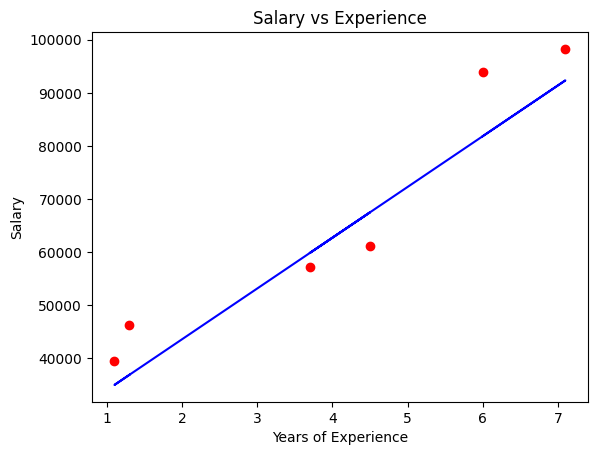

In [40]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,test_data_pred,color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()